Viser den rå data før ændingerne sker, den vises kun for at få et før/efter billede af dataen.

In [169]:
import pandas as pd
"""Shows data before it is changed"""
data = pd.read_csv("Sleep_health_and_lifestyle_dataset_no_duplicates.csv")
print(data.to_string())

     Gender   Age   Occupation             Sleep Duration   Quality of Sleep   Physical Activity Level   Stress Level   BMI Category    Blood Pressure   Heart Rate   Daily Steps  Sleep Disorder
0    Male       27  Software Engineer                  6.1                  6                        42              6  Overweight      126/83                    77          4200            NaN
1    Male       28  Doctor                             6.2                  6                        60              8  Normal          125/80                    75         10000            NaN
2    Male       28  Sales Representative               5.9                  4                        30              8  Obese           140/90                    85          3000    Sleep Apnea
3    Male       28  Software Engineer                  5.9                  4                        30              8  Obese           140/90                    85          3000       Insomnia
4    Male       29  Teacher   

In [170]:
# Fjern mellemrum i kolonnenavne
data.columns = data.columns.str.strip()

# Fjern ekstra mellemrum i værdierne i 'BMI Category'
data['BMI Category'] = data['BMI Category'].str.strip()

In [171]:
"""BMI category ordinal encoding"""
weight_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Normal Weight': 1,
    'Overweight': 2,
    'Obese': 3
}
#Sætter de nye grænseværdier
data['Weight_Category_BMI'] = data['BMI Category'].map(weight_mapping)

In [172]:
#Ændre køn til 0 = kvinde 1 = mand
gender_mapping = {
    'Female': 0,
    'Male': 1
}

#Indsætter den nye kolonne som skal erstatte Gender i det endelige resultat af databehandling
data['Gender_Numerical'] = data['Gender'].str.strip().map(gender_mapping)


In [173]:
# Scaler the 'Physical Activity Level' colonnen, så den er mellem 1-10
data['Physical Activity Level (scaled)'] = 1 + (data['Physical Activity Level'] - 1) * (10 - 1) / (100 - 1)

In [174]:
# Scaler 'Heart Rate' colonnen, så den er mellem 1-10
data['Heart Rate (scaled)'] = 1 + (data['Heart Rate'] - 1) * (10 - 1) / (100 - 1)

In [175]:
# Scaler 'Daily Steps' colonnen, så den er mellem 1-10
data['Daily Steps (scaled)'] = 1 + (data['Daily Steps'] - 1) * (10 - 1) / (10000 - 1)

In [176]:
# Scaler 'Age' colonnen, så den er mellem 1-10
data['Age (scaled)'] = 1 + (data['Age'] - 1) * (10 - 1) / (100 - 1)

In [177]:
"""Binary stress 0 = not stressed 1 = stressed"""
# Sørger for at gruppere stress i 2 kategorier 'Stress Level': 0 for ikke stresset (1-5), 1 for stresset (6-10)
data['Stress_Binary'] = data['Stress Level'].apply(lambda x: 1 if 6 <= x <= 10 else 0)

In [178]:
"""Fjerner irrelevante kolonner, der er mange, da nye bliver lavet længere oppe, her fjerne vi dem som er enten irrelevante eller som er lavet om"""
# Remove the 'User_ID and age' column
data = data.drop(columns=["Occupation", "Sleep Disorder", "Blood Pressure", "BMI Category", "Physical Activity Level", "Daily Steps", "Stress Level", "Gender", "Heart Rate", "Age"])

In [179]:
"""Fjern # hvis du vil se hele datasættet"""
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns

#from IPython.display import display
#display(data)

data.head(5)

,Sleep Duration,Quality of Sleep,Weight_Category_BMI,Gender_Numerical,Physical Activity Level (scaled),Heart Rate (scaled),Daily Steps (scaled),Age (scaled),Stress_Binary
0,6.1,6,2,1,4.727273,7.909091,4.779478,3.363636,1
1,6.2,6,1,1,6.363636,7.727273,10.000000,3.454545,1
2,5.9,4,3,1,3.636364,8.636364,3.699370,3.454545,1
3,5.9,4,3,1,3.636364,8.636364,3.699370,3.454545,1
4,6.3,6,3,1,4.545455,8.363636,4.149415,3.545455,1


In [180]:
data.tail(5)

,Sleep Duration,Quality of Sleep,Weight_Category_BMI,Gender_Numerical,Physical Activity Level (scaled),Heart Rate (scaled),Daily Steps (scaled),Age (scaled),Stress_Binary
127,8.0,9,2,0,7.727273,7.090909,7.29973,6.272727,0
128,8.1,9,2,0,7.727273,7.090909,7.29973,6.272727,0
129,8.2,9,2,0,7.727273,7.090909,7.29973,6.272727,0
130,8.0,9,2,0,7.727273,7.090909,7.29973,6.272727,0
131,8.1,9,2,0,7.727273,7.090909,7.29973,6.272727,0


In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

#X =Indeholder alle kolonner fra datasættet undtagen den kolonne som er Stress_Binary
#y = Indeholder kun Stress_Binary som er vores mål variabel
X = data.drop(columns=['Stress_Binary'])
y = data['Stress_Binary']

#Hvor mange naboer
k = 11
#Starter algoritmen med de hyperparametre som er sat
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric = "manhattan") 
#Test af yderligere parametre som weights og algorithm gav intet bedre resultat. 
#Dog giver manhatten bedre resultat end euclidean (ca. 3% accuracy)

In [182]:
#Simple split af datasættet så modellen kan trænes og gemmes da dette ikke kan gøres ved cross-validation. Cross-validation bruges udelukkende til at teste modellens robusthed

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.90      1.00      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [183]:
# Brug krydsvalidering med 10 folds for at evaluere modellen
cv_scores = cross_val_score(knn_classifier, X, y, cv = 10)

# Printer resultater for hver fold og deres gennemsnit
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.92857143 1.         1.         0.84615385 0.69230769 0.76923077
 0.53846154 0.92307692 1.         0.76923077]
Mean Accuracy: 0.8467032967032967


In [184]:
# Får værdierne ud, så man kan se dem som acc, precision og recall
y_pred_cv = cross_val_predict(knn_classifier, X, y, cv = 10)

# Printer resultater
print("Accuracy:", accuracy_score(y, y_pred_cv))
print("Precision:", precision_score(y, y_pred_cv))
print("Recall:", recall_score(y, y_pred_cv))

Accuracy: 0.8484848484848485
Precision: 0.8309859154929577
Recall: 0.8805970149253731


Confusion Matrix:
 [[53 12]
 [ 8 59]]


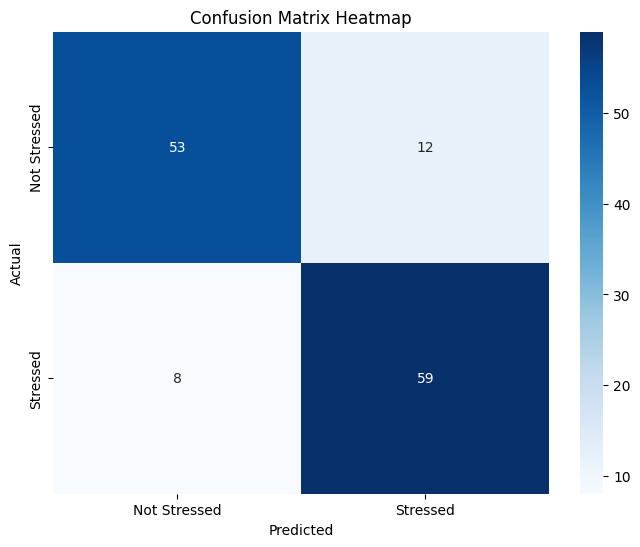

In [185]:
# laver Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stressed', 'Stressed'], yticklabels=['Not Stressed', 'Stressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

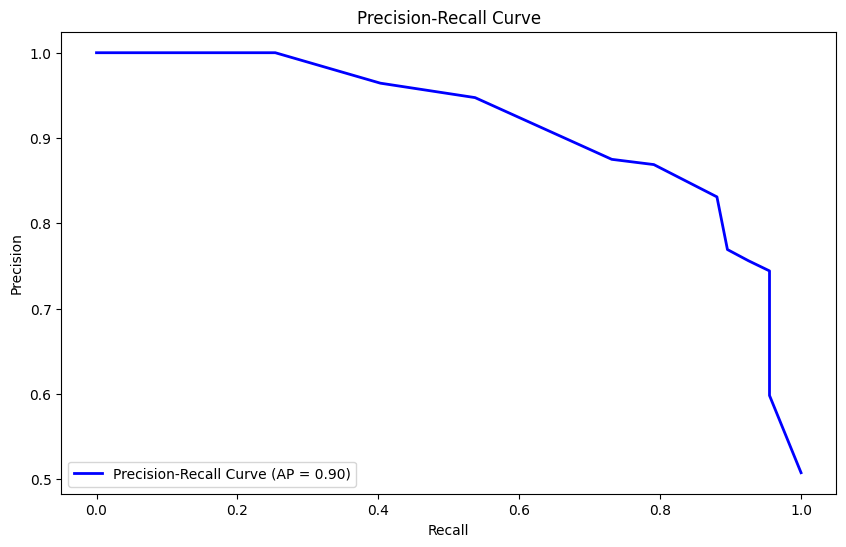

In [186]:
#Brug cross_val_predict med sandsynligheder
y_pred_cv = cross_val_predict(knn_classifier, X, y, cv=10, method="predict_proba")[:, 1]  # Sandsynligheder for positiv klasse


#Beregn Precision-Recall og plot
precision, recall, thresholds_pr = precision_recall_curve(y, y_pred_cv)
average_precision = average_precision_score(y, y_pred_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
#AP = Average Precision. Er et mål for modellens præcision over forskellige niveauer af recall. Det er et tal mellem 0 og 1, hvor en højere værdi indikerer, at modellen er bedre til at finde positive eksempler uden at inkludere mange falske positive.

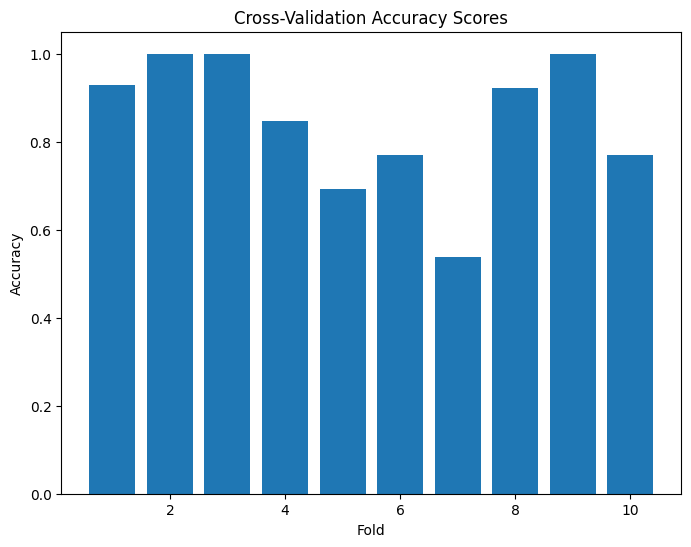

In [187]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

In [188]:
"""Umiddelbart findes der ikke en feature importance for en KNN ligesom der gør ved RF og LR"""

'Umiddelbart findes der ikke en feature importance for en KNN ligesom der gør ved RF og LR'

In [189]:
import joblib

#  Gemme modellen
joblib.dump(knn_classifier, "stress_model_KNN.pkl")
print("Modellen er gemt")

Modellen er gemt
